# Recursive with Top down
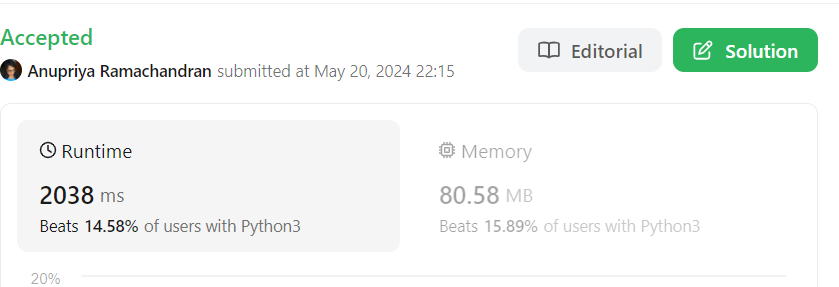

In [1]:
from typing import List
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        dp = [[[-1 for _ in range(3)]for _ in range(2)]for _ in range(len(prices))]
        return self.helper(dp, prices, 0, 0, k = 2)

    def helper(self, dp, prices, idx, buy, k):
        if idx > len(prices) - 1 or k <= 0:
            return 0

        if dp[idx][buy][k] == -1:
            if buy == 0:
                dp[idx][buy][k] =  max(self.helper(dp, prices, idx + 1, 1, k)- prices[idx], self.helper(dp, prices, idx + 1, 0, k))
            else:
                dp[idx][buy][k] =  max(prices[idx] + self.helper(dp, prices, idx + 1, 0, k-1 ), self.helper(dp, prices, idx + 1, 1, k))
        return dp[idx][buy][k]

# Bottom Up  => This is Tricky 
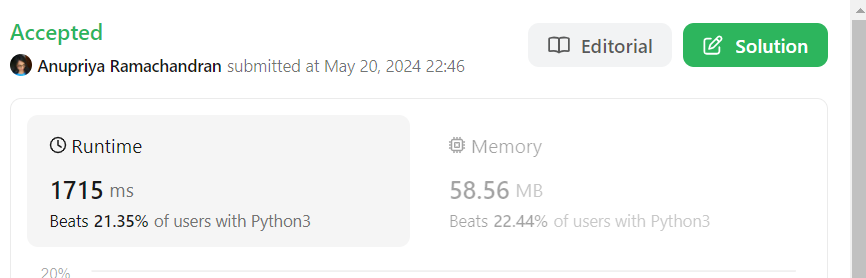

In [2]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        dp = [[[0 for _ in range(3)]for _ in range(2)]for _ in range(len(prices) + 1)]   # We take 1 + k as well as 1 + n
        n  = len(prices)
        
        # We are omiting the base cases since the values are already 0

        for i in range(n-1, -1, -1):   #Iterate backwards as usual
            for j in range(2):
                for k in range(1,3):    #this we will take from 1, 3, since value at k=0 should be 0
                    if j == 0:
                        dp[i][j][k] = max(dp[i+1][1][k]- prices[i], dp[i+1][0][k])
                    else:
                        dp[i][j][k] = max(prices[i] + dp[i+1][0][k-1], dp[i+1][1][k])
        return dp[0][0][2]   #Here we are returning dp at n = 0 , j = 0 {buy} and k = 2 {max transactions} {since thats our requirement}

# Space Optimization
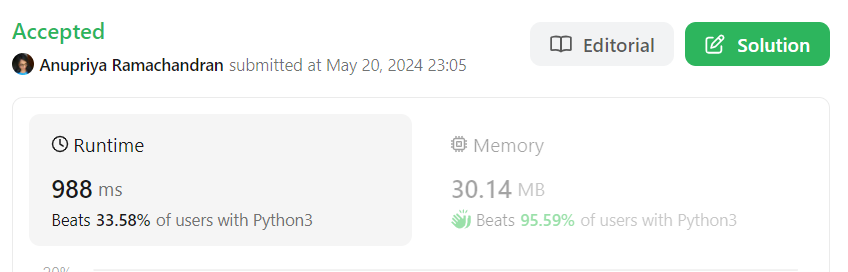

In [3]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        front = [[0 for _ in range(3)] for _ in range(2)]
        cur = [[0 for _ in range(3)] for _ in range(2)]
        n  = len(prices)

        for i in range(n-1, -1, -1):
                for k in range(1,3):
                    cur[0][k] = max(front[1][k]- prices[i], front[0][k])
                    cur[1][k] = max(prices[i] + front[0][k-1], front[1][k])
                    front = cur.copy()
        return cur[0][2]